# Data Cleaning \& Feature Engineering Notebook

In [1]:
import numpy as np
import pandas as pd

In [63]:
modcloth_data = pd.read_json('modcloth_final_data.zip', lines=True)

In [2]:
rtr_data = pd.read_json('rent_the_runway_data.zip', lines=True)

In [3]:
rtr_data.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [4]:
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [5]:
rtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
age               191584 non-null float64
body type         177907 non-null object
bust size         174133 non-null object
category          192544 non-null object
fit               192544 non-null object
height            191867 non-null object
item_id           192544 non-null int64
rating            192462 non-null float64
rented for        192534 non-null object
review_date       192544 non-null object
review_summary    192544 non-null object
review_text       192544 non-null object
size              192544 non-null int64
user_id           192544 non-null int64
weight            162562 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


### Next Steps for Rent The Runway:
1. change column name spaces to underscores
2. convert ```review_date``` to datetime
3. determine if ```rented_for``` is a categorical
4. determine if ```body_type``` is categorical
5. determine if ```fit``` is categorical
6. convert ```weight``` to pounds as an int64
7. find size chart data on RTR and add that to each user
8. Change ```bust_size``` to ```band_size``` and ```cup_size``` and make ```band_size``` an int
9. look for ```item_id``` on RTR site _is not on site_
10. convert ```height``` to inches as an int

In [6]:
rtr_data = rtr_data.rename(columns={'body type':'body_type', 'bust size':'bust_size', 'rented for':'rented_for'})

In [7]:
rtr_data.columns

Index(['age', 'body_type', 'bust_size', 'category', 'fit', 'height', 'item_id',
       'rating', 'rented_for', 'review_date', 'review_summary', 'review_text',
       'size', 'user_id', 'weight'],
      dtype='object')

In [8]:
rtr_data['review_datetime'] = pd.to_datetime(rtr_data.review_date)

In [9]:
rtr_data.rented_for.unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [10]:
rtr_data.body_type.unique()

array(['hourglass', 'straight & narrow', nan, 'pear', 'athletic',
       'full bust', 'petite', 'apple'], dtype=object)

In [11]:
rtr_data.fit.unique()

array(['fit', 'small', 'large'], dtype=object)

In [12]:
def convert_lbs_to_int(pounds):
    if type(pounds) == str:
        if pounds.endswith('lbs'):
            return int(pounds[:-3])
    elif np.isnan(pounds):
        return

In [13]:
rtr_data.weight = rtr_data.weight.apply(convert_lbs_to_int)

In [14]:
def separate_band_and_cup(bust_size):
    if type(bust_size) == str:
#         return int(bust_size[:2]), bust_size[2:]
        return bust_size[:2]+','+bust_size[2:]
    elif np.isnan(bust_size):
        return np.NaN, np.NaN

In [15]:
# rtr_data['band'], rtr_data['cup'] = 
rtr_data.bust_size.apply(separate_band_and_cup)[0]

'34,d'

In [16]:
rtr_data.columns

Index(['age', 'body_type', 'bust_size', 'category', 'fit', 'height', 'item_id',
       'rating', 'rented_for', 'review_date', 'review_summary', 'review_text',
       'size', 'user_id', 'weight', 'review_datetime'],
      dtype='object')

In [ ]:
rtr_data.info()

In [20]:
rtr_data = pd.concat([rtr_data, bust_cup], axis=1)

In [65]:
def convert_feetinches_to_inches(distance):
    if type(distance) == str:
        inches = 0
        for i, ft in enumerate(distance):
            if ft=='f' or ft=='\'':
                inches += 12*int(distance[:i])
            if ft=='i' or ft=='\"':
                inches += int(distance[i-2:i].strip())
        return inches
    elif np.isnan(distance):
        return np.NaN

In [22]:
rtr_data.height = rtr_data.height.apply(convert_feetinches_to_inches)
rtr_data.head()

,age,body_type,bust_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight,review_datetime,band_size,cup_size
0,28.0,hourglass,34d,romper,fit,68.0,2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137.0,2016-04-20,34,d
1,36.0,straight & narrow,34b,gown,fit,66.0,153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132.0,2013-06-18,34,b
2,116.0,NaN,NaN,sheath,fit,64.0,1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN,2015-12-14,NaN,NaN
3,34.0,pear,34c,dress,fit,65.0,126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135.0,2014-02-12,34,c
4,27.0,athletic,34b,gown,fit,69.0,616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145.0,2016-09-26,34,b


In [23]:
def convert_to_int(band):
    if type(band)==str:
        return int(band)
    elif band==np.NaN:
        pass

In [24]:
rtr_data.band_size = rtr_data.band_size.apply(convert_to_int)

In [45]:
rtr_dress_sizes = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, '24+']

In [46]:
rtr_body_types = ['apple', 'athletic', 'full bust', 'hour glass', 'pair', 'petite', 'straight & narrow']

In [47]:
rtr_jean_sizes = list(range(24, 41))

In [48]:
bust_sizes = list(range(28, 50, 2))
cup_sizes = ['aa', 'a', 'b', 'c', 'd', 'dd', 'ddd/e', 'f', 'g', 'h', 'i', 'j']
rtr_bust_sizes = [str(bust)+cup for bust in bust_sizes for cup in cup_sizes]

Next steps for Modcloth
1. Call ```bra_size``` ```band```

### Questions:
1. Given a height range, did users with higher weight have different ratings than users with lower weight?
    -To see if the company improved
2. 

In [30]:
np.quantile(rtr_data.item_id.value_counts(), .75, axis = 0)

32.0

In [43]:
Item_ratings = rtr_data[['item_id','rating']].groupby(rtr_data.item_id).count().sort_values('rating',ascending = False)
items = Item_ratings.loc[Item_ratings.rating>=32]


(1499, 2)

In [87]:
import scipy.stats as stats
top_500  = items.head(500)
bottom_500 = items.tail(500)


stats.ttest_ind(top_500.rating, bottom_500.rating, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=15.302363688130598, pvalue=1.2693233178782092e-43)

modcloth_data.info()

In [61]:
modcloth_data.review_summary.tail()

82785                 Cute jacket!
82786     It's a beautiful jacket.
82787    I love this blazer. It is
82788    I love this blazer!! I wo
82789    I love this piece. I'm re
Name: review_summary, dtype: object

In [62]:
modcloth_data.review_text.tail()

82785                                         Cute jacket!
82786    It's a beautiful jacket. I love how it's knit ...
82787    I love this blazer. It is a great office piece...
82788    I love this blazer!! I wore it yesterday and g...
82789         I love this piece. I'm really happy with it!
Name: review_text, dtype: object

In [66]:
modcloth_data.height = modcloth_data.height.apply(convert_feetinches_to_inches)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [67]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null float64
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.4+ MB


In [74]:
modcloth_data.duplicated().value_counts()

False    82413
True       377
dtype: int64

In [77]:
modcloth_data.drop_duplicates(keep = False, inplace= True)

In [78]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76070 non-null float64
bust              11738 non-null object
category          82036 non-null object
cup size          75835 non-null object
fit               82036 non-null object
height            80933 non-null float64
hips              55544 non-null float64
item_id           82036 non-null int64
length            82001 non-null object
quality           81968 non-null float64
review_summary    75343 non-null object
review_text       75343 non-null object
shoe size         27665 non-null float64
shoe width        18435 non-null object
size              82036 non-null int64
user_id           82036 non-null int64
user_name         82036 non-null object
waist             2880 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.9+ MB


In [79]:
columns_to_drop_modcloth = [
    'bust','shoe size','shoe width','waist'
]
modcloth_data.drop(columns_to_drop_modcloth, axis = 1, inplace = True)
modcloth_data.head()

,bra size,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,size,user_id,user_name
0,34.0,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,7,991571,Emily
1,36.0,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,13,587883,sydneybraden2001
2,32.0,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,7,395665,Ugggh
3,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,21,875643,alexmeyer626
4,36.0,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,18,944840,dberrones1


In [80]:
modcloth_data.quality.describe()

count    81968.000000
mean         3.949126
std          0.992892
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: quality, dtype: float64

In [81]:
modcloth_data.length.value_counts()

just right        61376
slightly long     11179
slightly short     6241
very long          2406
very short          799
Name: length, dtype: int64

In [85]:
top_ratings = modcloth_data[(modcloth_data.length == 'just right')&(modcloth_data.quality >=4.0)]
top_ratings.describe()

,bra size,height,hips,item_id,quality,size,user_id
count,40456.000000,42908.000000,29440.000000,43493.000000,43493.000000,43493.000000,43493.000000
mean,35.904637,65.132493,40.258865,463212.177086,4.541811,12.459844,498841.039777
std,3.237236,2.837985,5.825830,215498.476042,0.498254,8.269546,286728.919053
min,28.000000,36.000000,30.000000,123373.000000,4.000000,0.000000,6.000000
25%,34.000000,63.000000,36.000000,298256.000000,4.000000,8.000000,252364.000000
50%,36.000000,65.000000,39.000000,427567.000000,5.000000,12.000000,498938.000000
75%,38.000000,67.000000,43.000000,657081.000000,5.000000,15.000000,745374.000000
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999923.000000


In [86]:
modcloth_data.describe()

,bra size,height,hips,item_id,quality,size,user_id
count,76070.000000,80933.000000,55544.000000,82036.000000,81968.000000,82036.000000,82036.000000
mean,35.971079,65.142562,40.358617,469510.119204,3.949126,12.657809,498788.808755
std,3.223979,2.849230,5.828654,214136.368217,0.992892,8.269573,286293.903277
min,28.000000,36.000000,30.000000,123373.000000,1.000000,0.000000,6.000000
25%,34.000000,63.000000,36.000000,314980.000000,3.000000,8.000000,252931.750000
50%,36.000000,65.000000,39.000000,454030.000000,4.000000,12.000000,497571.000000
75%,38.000000,67.000000,43.000000,658440.000000,5.000000,15.000000,744574.000000
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999972.000000


In [89]:
#T-test that height affects high rating
stats.ttest_ind(modcloth_data.height,top_ratings.height, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=0.5933417174906913, pvalue=0.5529540147147909)

In [92]:
#T-test that height affects high rating
stats.ttest_ind(modcloth_data[modcloth_data.height >= 65.1].height,top_ratings.height, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=150.39817993481623, pvalue=0.0)

In [93]:
#T-test that height affects high rating
stats.ttest_ind(modcloth_data[modcloth_data.height < 65.1].height,top_ratings.height, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=-128.60187416107559, pvalue=0.0)

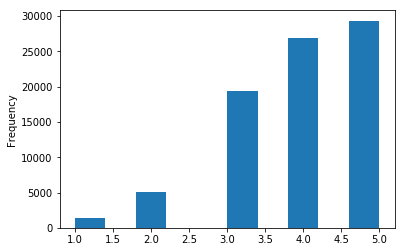

In [97]:
%matplotlib inline
modcloth_data.quality.plot(kind='hist')

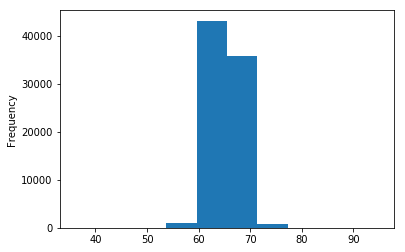

In [98]:
modcloth_data.height.plot(kind='hist')

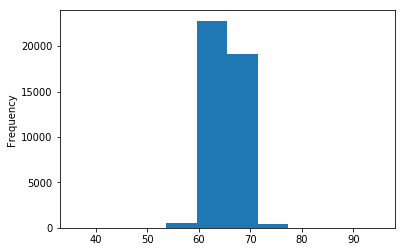

In [99]:
top_ratings.height.plot(kind='hist')